Using k-means clustering for image compression.
Reduce the number of colors to only the most common ones.
Note: This might be cool for other things!

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

K-means:

Guess initial centroids

Repeat until stopping criteria {

Assign examples to closest centroids

Recompute centroids as average point of all points assigned to that centroid.

}

In [3]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for each example in X
    
    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): k centroids
        
    Returns:
        idx (array_like): (m,) closest centroids
    """
    
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    
    for i in range(X.shape[0]):
        # For each centroid, find dist to centroid
        # Then pick lowest
        dist = []
        for j in range(K):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            dist.append(norm_ij)
            
        idx[i] = np.argmin(dist)
        
    return idx


In [4]:
X = load_data()
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closest_centroids(X, initial_centroids)
print(idx[:3]) # expect 0, 2, 1

[0 2 1]


Next is to recompute centroids - the mean of all points assigned to it.

For each centroid, $\mu_i$, we set $\mu_i = \frac{1}{|c_k|} \sum_{i \in c_k} x^{(i)}$

In [28]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the data points assigned to each centroid.
    
    Args:
        X (ndarray): (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each example in X.
        K (int): number of centroids
        
    Returns:
        centroids (ndarray): (K, n) New centroids
    """
    
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    for k in range(K):
        c_k = X[idx == k]
        new_centroid = (1 / len(c_k)) * np.sum(c_k, axis=0) # Axis is important!
        centroids[k] = new_centroid
#         centroids[k] = np.mean(c_k, axis=0)
        
#         print(new_centroid, centroids[k])
    return centroids
    

In [29]:
K = 3
centroids = compute_centroids(X, idx, K)

from public_tests import *
compute_centroids_test(compute_centroids)

All tests passed!


In [30]:
def run_kMeans(X, initial_centroids, max_iters=10):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    
    for i in range(max_iters):
        print(f"K-Means iteration {i}/{max_iters - 1}")
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
        
    return centroids, idx

In [34]:
centroids, idx = run_kMeans(X, initial_centroids)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [35]:
centroids, idx

(array([[1.95399466, 5.02557006],
        [3.04367119, 1.01541041],
        [6.03366736, 3.00052511]]),
 array([0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        

Cool. Random initialization should be the way to go, though, selecting at random from the dataset (instead of our manually selected initial_centroids).

One way is to shuffle the indices of X, using np.random.permutation, then selecting the first K samples.

Don't know why that's better than selecting randomly to fucking start with, but who am I to go against this shiny notebook.

In [36]:
def kMeans_init_centroids(X, K):
    """
    Initializes K centroids that are to be used in K-Means on the dataset provided.
    
    Args:
        X (ndarray): Dataset
        K (int): number of centroids
        
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    
    return centroids
    

In [38]:
run_kMeans(X, kMeans_init_centroids(X, 3))

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


(array([[6.03366736, 3.00052511],
        [3.04367119, 1.01541041],
        [1.95399466, 5.02557006]]),
 array([2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        

Nice.

Now to try it on image compression.

In a standard 24-bit color representation of an image, eachh pixel is represented as 3 8-bit integers (0-255) to specify RGB intensity values. RGB encoding, basic stuff.

But that's so many colors and it hurts my simple eyes. I want that 16 colors, or 4-bits. I want it compressed and I don't care about it coming out quite right.

So we use K-means to select those particular colors - effectively, we are treating each pixel in the original image as a data point, using K-means to find the 16 bests clusters of colors to use in the 3d RGB space.

Then, actually do the compressing.

<img src="images/figure 2.png" width="500" height="500">

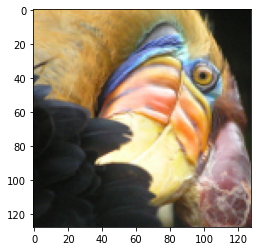

In [40]:
# Load image and display for verification
original_image = plt.imread('bird_small.png')
plt.imshow(original_image)

In [59]:
# Standard data familiarity
print(f"Original image size: {original_image.shape}")
# 3 dimensions, X, Y, RGB
print(original_image[0, 0])

Original image size: (128, 128, 3)
[0.85882354 0.7058824  0.40392157]


In [63]:
# Some data processing, want a 2d matrix, mx3, where m = 128x128 = 16384
# Divide by 255, so each value is in range(0, 1) and reshape
reshaped = original_image # / 255
X_img = np.reshape(reshaped, (reshaped.shape[0] * reshaped.shape[1], 3))

In [65]:
K = 16
max_iters = 10

initial_centroids = kMeans_init_centroids(X_img, K)
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [66]:
print(f"Shape of idx: {idx.shape}\nClosest centroid for first 5 elements: {idx[:5]}")

Shape of idx: (16384,)
Closest centroid for first 5 elements: [3 3 3 3 3]


In [69]:
# Now, we can assign each pixel position to the closest centroid with the find_closest_centroids
# Since we're not using the 4 bits as you would in a real 4-bit system, we need a little overhead 
# in the form of a dictionary, but for images larger than a couple of pixels, the compression is there.
# Roughly a factor of 6, even with the dictionary in this particular case.

# Represent image in terms of indices
X_recovered = centroids[idx, :]

# Reshaped recovered into proper dimensions
X_recovered = np.reshape(X_recovered, original_image.shape)


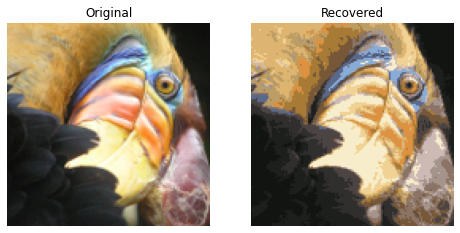

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
plt.axis('off')

ax[0].imshow(original_image)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(X_recovered)
ax[1].set_title('Recovered')
ax[1].set_axis_off()